This notebook visualises the temperature by height above floor level.

In [87]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [88]:
import utils

## Load and preprocess data

In [89]:
# get file listing all temperature records
file_rec="records.csv"
df_rec = utils.read_records_file(file_rec)
df_rec.head(3)

,ID,file_name,location,sensor_color
0,1,SalonDijonPeinture_20220829231748.xls,salon_thermostat,yellow
1,2,SalonVagueChaleur_20220815165409.xls,salon_thermostat,yellow
2,3,Salon_20220804092851.xls,salon_thermostat,yellow


In [90]:
def process_time_series(df_bas, df_moyen, df_haut):

    assert len(df_moyen) == len(df_bas)
    assert len(df_moyen) == len(df_haut)

    # reset all sensors to have exactly the same timestamps
    df_bas["Time"] = df_haut["Time"].values
    df_moyen["Time"] = df_haut["Time"].values
    
    df_all = pd.concat((df_bas, df_moyen, df_haut))
    
    df_p = df_all.pivot(index='Time', columns='height', values='Temperature°C')
    
    return df_p


def plot_differences_as_timeseries(df_p, heights):
    df_p["haut - bas"] = df_p[heights[2]] - df_p[heights[0]]
    df_p["haut - moyen"] = df_p[heights[2]] - df_p[heights[1]]
    df_p["moyen - bas"] = df_p[heights[1]] - df_p[heights[0]]
    
    fig = go.Figure()

    for col in ["haut - bas", "haut - moyen", "moyen - bas"]:

        fig.add_trace(go.Scatter(x=df_p.index, y=df_p[col],
                            mode='lines',
                            name=col))
    fig.update_layout(yaxis_title="$\Delta T$",
                      title="Temperature differences between sensors")

    fig.show()
    
    
def plot_heatmap(df_p, heights):
    
    dates = df_p.index
    values = df_p[heights].T.values
    plt.contourf(dates, heights, values, cmap='RdBu_r')
    plt.colorbar()
    plt.gcf().set_size_inches((17,5))
    plt.ylabel('Height above ground / cm')
    plt.show()
    
    
def plot_heatmap_plotly(df_p, heights):
    
    dates = df_p.index
    values = df_p[heights].T.values
    
    fig2 = go.Figure()

    fig2.add_trace(go.Contour(z=values,
                              x=dates, # horizontal axis
                              y=heights, # vertical axis
                              colorscale="RdBu_r",
                              line_smoothing=0.85,
                              contours_coloring='heatmap',
                              colorbar=dict(
                title='Temperature / degrees Celcius', # title here
                titleside='right')
                              ))
    fig2.update_layout(yaxis_title="Height above ground / cm")

## Location 1

In [91]:
df_bas = utils.get_all_data_for_location("chambre_chevet_lucienne_bas", df_rec)
df_moyen = utils.get_all_data_for_location("chambre_chevet_lucienne_haut", df_rec)
df_haut = utils.get_all_data_for_location("chambre_armoire", df_rec)

Treating  chambre_chevet_lucienne_bas EFE228102339_20221228093511.xls
Treating  chambre_chevet_lucienne_haut EFE227102152_20221202174206.xls
Treating  chambre_chevet_lucienne_haut EFE227102152_20221228093907.xls
Treating  chambre_armoire EFE227102191_20221228094239.xls


In [92]:
heights = [27, 70, 192]  # heights above ground level in cm

In [93]:
df_bas["height"] = 27
df_moyen["height"] = 70
df_haut["height"] = 192

In [94]:
print(df_bas.Time.min())
print(df_moyen.Time.min())
print(df_haut.Time.min())

2022-12-19 23:04:31
2022-11-23 22:05:15
2022-12-19 23:04:17


In [95]:
# only keep the time period for which we have data with all three sensors
df_moyen = df_moyen[df_moyen.Time > pd.to_datetime('2022-12-19 23:00:00')]

In [96]:
print(df_bas.Time.min())
print(df_moyen.Time.min())
print(df_haut.Time.min())

2022-12-19 23:04:31
2022-12-19 23:04:24
2022-12-19 23:04:17


In [97]:
df_p = process_time_series(df_bas, df_moyen, df_haut)
df_p

height,27,70,192
Time,,,
2022-12-19 23:04:17,16.4,17.5,18.4
2022-12-19 23:19:17,16.4,17.6,18.3
2022-12-19 23:34:17,16.4,17.9,18.6
2022-12-19 23:49:17,16.7,18.0,18.5
2022-12-20 00:04:17,16.7,18.0,18.6
...,...,...,...
2022-12-28 08:19:17,16.0,16.5,16.7
2022-12-28 08:34:17,16.0,16.5,16.7
2022-12-28 08:49:17,16.0,16.4,16.7


### Plot temperature differences - location 1

In [98]:
plot_differences_as_timeseries(df_p, heights)

### Plot temperature over time - location 1

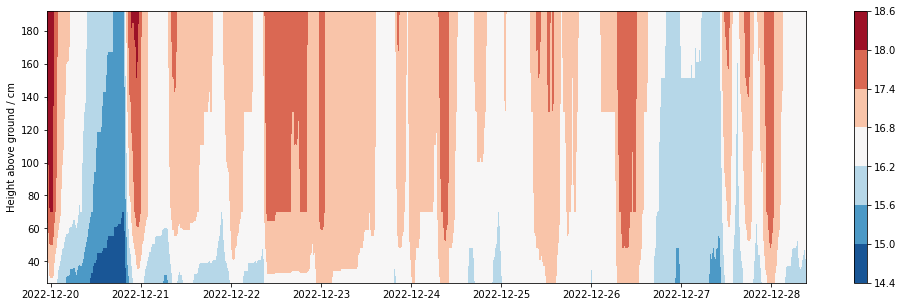

In [99]:
plot_heatmap(df_p, heights)

## Location 2

In [100]:
df_bas = utils.get_all_data_for_location("salon_papier_brouillon", df_rec)
df_moyen = utils.get_all_data_for_location("salon_etagere_joulik", df_rec)
df_haut = utils.get_all_data_for_location("salon_plafond_fenetre", df_rec)

Treating  salon_papier_brouillon EFE228102339_20230122160030.xls
Treating  salon_etagere_joulik EFE227102191_20221209204027.xls
Treating  salon_etagere_joulik EFE227102191_20221211151357.xls
Treating  salon_etagere_joulik EFE227102152_20230122160433.xls
Treating  salon_plafond_fenetre EFE227102191_20230122160808.xls


In [101]:
heights = [24, 127, 235]  # heights above ground level in cm

In [102]:
df_bas["height"] = 24
df_moyen["height"] = 127
df_haut["height"] = 235

In [103]:
print(df_bas.Time.min())
print(df_moyen.Time.min())
print(df_haut.Time.min())

print()

print(df_bas.Time.max())
print(df_moyen.Time.max())
print(df_haut.Time.max())

2022-12-28 17:00:53
2022-12-02 18:23:35
2022-12-28 17:00:59

2023-01-22 15:45:53
2023-01-22 16:00:47
2023-01-22 16:00:59


In [104]:
# only keep the time period for which we have data with all three sensors
df_moyen = df_moyen[df_moyen.Time > pd.to_datetime('2022-12-28 17:00:00')]
df_moyen = df_moyen[df_moyen.Time < pd.to_datetime('2023-01-22 15:46:00')]
df_haut = df_haut[df_haut.Time < pd.to_datetime('2023-01-22 15:46:00')]

In [105]:
print(df_bas.Time.min())
print(df_moyen.Time.min())
print(df_haut.Time.min())

print()

print(df_bas.Time.max())
print(df_moyen.Time.max())
print(df_haut.Time.max())

2022-12-28 17:00:53
2022-12-28 17:00:47
2022-12-28 17:00:59

2023-01-22 15:45:53
2023-01-22 15:45:47
2023-01-22 15:45:59


In [106]:
df_p = process_time_series(df_bas, df_moyen, df_haut)
df_p

height,24,127,235
Time,,,
2022-12-28 17:00:59,17.6,17.5,17.7
2022-12-28 17:15:59,17.5,17.4,17.8
2022-12-28 17:30:59,17.5,17.4,17.9
2022-12-28 17:45:59,17.5,17.4,17.9
2022-12-28 18:00:59,17.5,17.4,17.7
...,...,...,...
2023-01-22 14:45:59,16.1,17.0,18.4
2023-01-22 15:00:59,16.3,17.1,18.6
2023-01-22 15:15:59,16.4,17.1,18.5


### Plot temperature differences - location 2

In [107]:
plot_differences_as_timeseries(df_p, heights)

### Plot heatmap - location 2

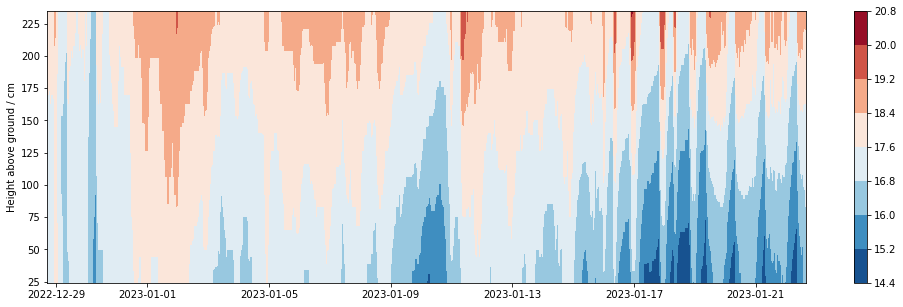

In [108]:
plot_heatmap(df_p, heights)